In [0]:
import numpy as np
import pandas as pd

from PIL import Image, ImageFont, ImageDraw
import matplotlib.pyplot as plt

In [0]:
%matplotlib inline
np.random.seed(4)

In [0]:
colnames = ['r-ankle-x','r-ankle-y','r-ankle-probability',
            'r-knee-x','r-knee-y','r-knee-probability',
            'r-hip-x','r-hip-y','r-hip-probability',
            'l-hip-x','l-hip-y','l-hip-probability',
            'l-knee-x','l-knee-y','l-knee-probability',
            'l-ankle-x','l-ankle-y','l-ankle-probability',
            'r-wrist-x','r-wrist-y','r-wrist-probability',
            'r-elbow-x','r-elbow-y','r-elbow-probability',
            'r-shoulder-x','r-shoulder-y','e-shoulder-probability',
            'l-shoulder-x','l-shoulder-y','l-shoulder-probability',
            'l-elbow-x','l-elbow-y','l-elbow-probability',
            'l-wrist-x','l-wrist-y','l-wrist-probability',
            'upper-neck-x','upper-neck-y','upper-neck-probability',
            'head-top-x','head-top-y','head-top-probability',
            'dir', 'pose']

#train = pd.read_csv('~/proj/capstone/train_joints.csv')
#train.columns = colnames 

#validation = pd.read_csv('~/proj/capstone/validation_joints.csv')
#validation.columns = colnames 

test = pd.read_csv('~/proj/capstone/test_joints.csv')
test.columns = colnames 

In [0]:
#train['pose'] = train['pose'].str.strip()
#validation['pose'] = validation['pose'].str.strip()
test['pose'] = test['pose'].str.strip()

In [0]:
#train['dir'] = train['dir'].str.strip()
#validation['dir'] = validation['dir'].str.strip()
test['dir'] = test['dir'].str.strip()

#train['dir'] = train['dir'].str.replace("\.\.","")
#validation['dir'] = validation['dir'].str.replace("\.\.","")
test['dir'] = test['dir'].str.replace("\.\.","")

In [0]:
test.head()

,r-ankle-x,r-ankle-y,r-ankle-probability,r-knee-x,r-knee-y,r-knee-probability,r-hip-x,r-hip-y,r-hip-probability,l-hip-x,...,l-wrist-y,l-wrist-probability,upper-neck-x,upper-neck-y,upper-neck-probability,head-top-x,head-top-y,head-top-probability,dir,pose
0,3.000483,27.452467,0.000021,58.240757,28.250101,0.000020,59.927360,0.237735,6.257453e-07,64.034043,...,24.083168,7.399863e-07,2.074578,25.279377,6.754006e-07,0.707225,26.695658,0.000006,/size_normed_images/multiplied/test/adho_mukha...,adho_mukha_svanasana
1,0.995506,27.229272,0.000033,61.341996,32.300344,0.000033,-6.163626,-2.536522,1.329131e-06,-1.738261,...,4.333432,3.956124e-06,1.495002,0.903639,3.075428e-06,0.998093,56.485568,0.000042,/size_normed_images/multiplied/test/adho_mukha...,adho_mukha_svanasana
2,1.580789,26.923415,0.000066,4.661932,30.577314,0.000029,-4.705657,-1.959287,4.322525e-06,-0.610878,...,3.099331,8.992084e-06,1.062206,0.470619,4.987739e-06,0.741050,27.275067,0.000025,/size_normed_images/multiplied/test/adho_mukha...,adho_mukha_svanasana
3,4.172385,4.914557,0.000052,1.647744,-0.976403,0.000008,-6.062608,-3.990599,1.752977e-06,0.621467,...,9.174580,1.581743e-05,1.857462,-0.728866,3.130557e-06,-2.264406,3.344332,0.000005,/size_normed_images/multiplied/test/adho_mukha...,adho_mukha_svanasana
4,52.023402,40.798413,0.000129,62.002668,34.853725,0.000036,-5.356067,-3.748661,1.082669e-06,0.694654,...,33.943469,4.207353e-06,1.121041,0.148208,1.197274e-06,0.557132,39.334982,0.000011,/size_normed_images/multiplied/test/adho_mukha...,adho_mukha_svanasana


In [0]:
dirs = ["adho_mukha_svanasana",  "bharadvajasana",  "pasasana",  "salamba_sarvangasana",  "salamba_sirsasana",  "virabhadrasana_i",  "virabhadrasana_ii",  "virabhadrasana_iii"]

In [0]:
resize = 5

In [0]:
def annotate_joints(joints):
    scale = 1
    img = Image.open('/home/shahbaz/proj'+joints['dir'])
    draw = ImageDraw.Draw(img)
    draw.text((joints['l-ankle-x'] * scale, joints['l-ankle-y'] * scale), "la")
    draw.text((joints['r-ankle-x'] * scale, joints['r-ankle-y'] * scale), "ra")
    draw.text((joints['l-knee-x'] * scale, joints['l-knee-y'] * scale), "lk")
    draw.text((joints['r-knee-x'] * scale, joints['r-knee-y'] * scale), "rk")
    draw.text((joints['l-hip-x'] * scale, joints['l-hip-y'] * scale), "lh")
    draw.text((joints['r-hip-x'] * scale, joints['r-hip-y'] * scale), "rh")
    draw.text((joints['l-wrist-x'] * scale, joints['l-wrist-y'] * scale), "lw")
    draw.text((joints['r-wrist-x'] * scale, joints['r-wrist-y'] * scale), "rw")
    draw.text((joints['l-shoulder-x'] * scale, joints['l-shoulder-y'] * scale), "ls")
    draw.text((joints['r-shoulder-x'] * scale, joints['r-shoulder-y'] * scale), "rs")
    draw.text((joints['l-elbow-x'] * scale, joints['l-elbow-y'] * scale), "le")
    draw.text((joints['r-elbow-x'] * scale, joints['r-elbow-y'] * scale), "re")
    return img

def rs(rows):
    arr = []
    for index, row in rows.iterrows():
        #print(row['dir'])
        #print(row)
        arr.append( annotate_joints(row) )
    return arr

In [0]:
#img = annotate_joints(test[0:1])

In [0]:
#arr = []
#for row in list(np.random.randint(0,len(test), 5)):
#    arr.append(annotate_joints(test[row:row+1]))
#    print(row)

In [0]:
def display_imgs(images):
    plt.figure(figsize=(20,10))
    columns = 5
    #images = [img, img, img, img, img]
    for i, image in enumerate(images):
        plt.subplot(len(images) / columns + 1, columns, i + 1)
        plt.imshow(image)


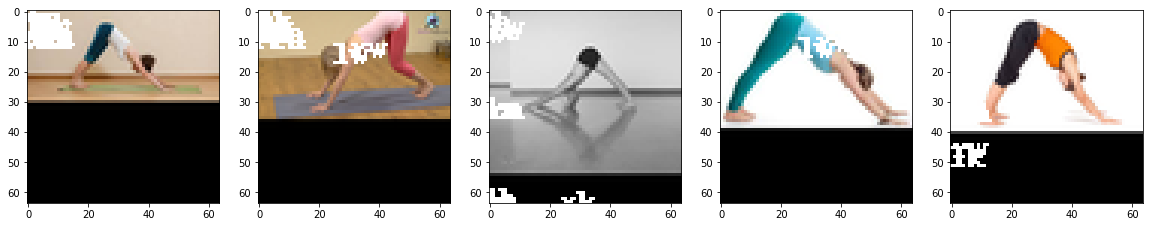

In [0]:
display_imgs( rs( test[test['pose'] == 'adho_mukha_svanasana'].sample(5) ) )

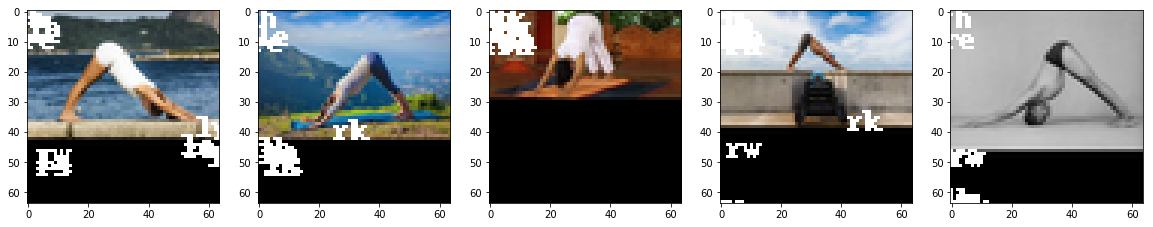

In [0]:
display_imgs( rs( test[test['pose'] == 'adho_mukha_svanasana'].sample(5) ) )

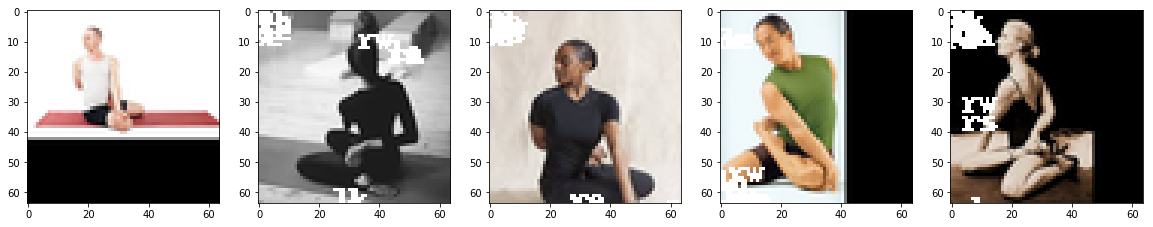

In [0]:
display_imgs( rs( test[test['pose'] == 'bharadvajasana'].sample(5) ) )

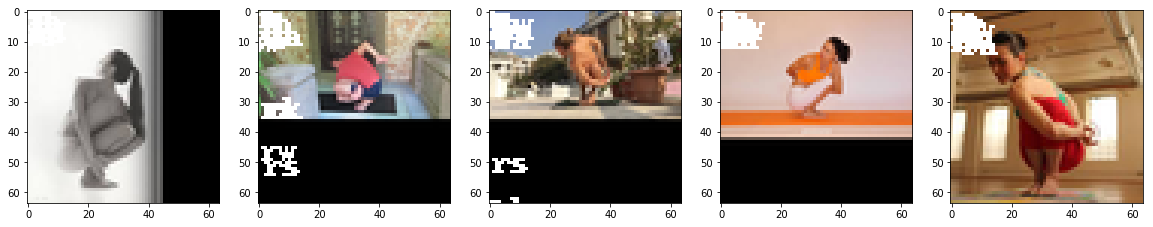

In [0]:
display_imgs( rs( test[test['pose'] == 'pasasana'].sample(5) ) )

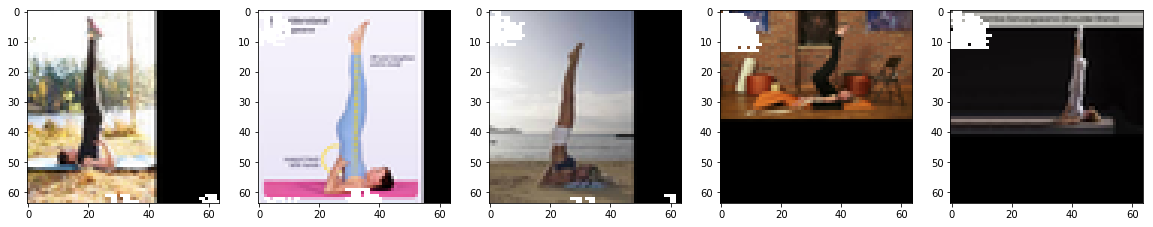

In [0]:
display_imgs( rs( test[test['pose'] == 'salamba_sarvangasana'].sample(5) ) )

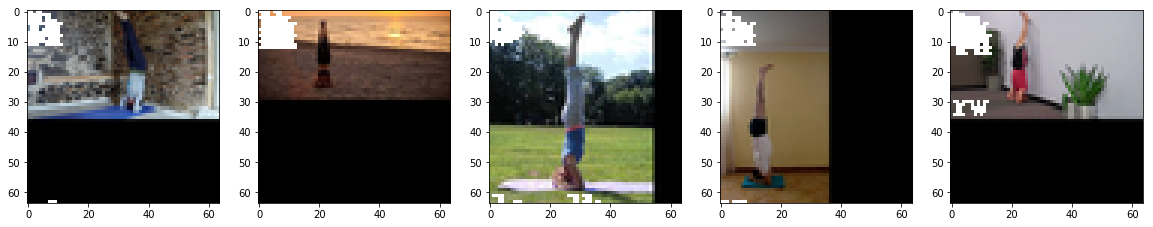

In [0]:
display_imgs( rs( test[test['pose'] == 'salamba_sirsasana'].sample(5) ) )

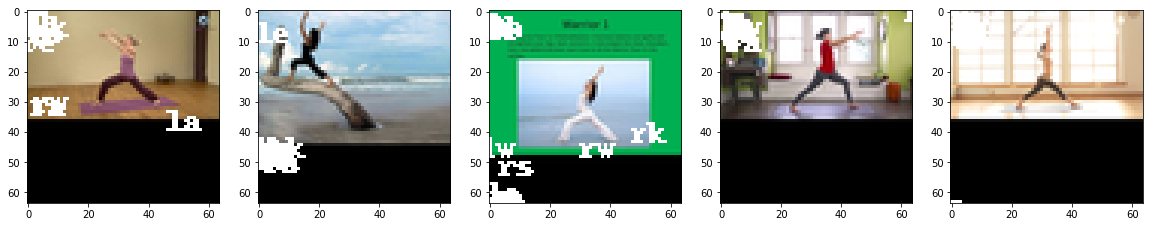

In [0]:
display_imgs( rs( test[test['pose'] == 'virabhadrasana_i'].sample(5) ) )

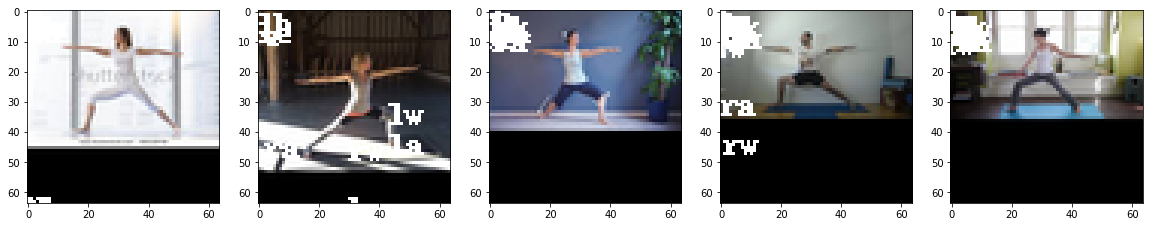

In [0]:
display_imgs( rs( test[test['pose'] == 'virabhadrasana_ii'].sample(5) ) )

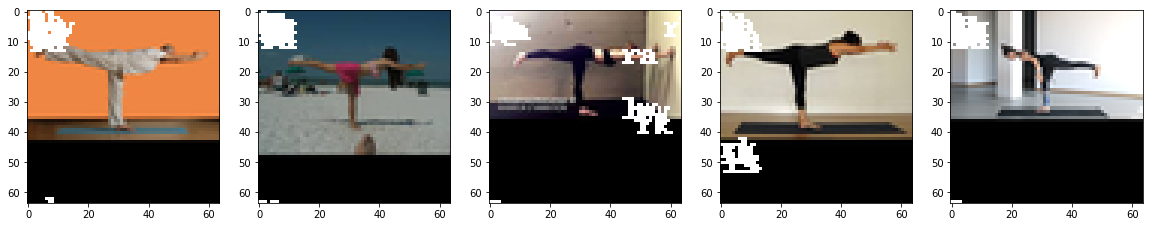

In [0]:
display_imgs( rs( test[test['pose'] == 'virabhadrasana_iii'].sample(5) ) )